#  IDEA LAB 8th Weekly Seminar Conference Code File
## Hyperbolic Tangent
### Writer: Su-Yeon Kang 
2022.08.22

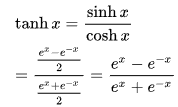
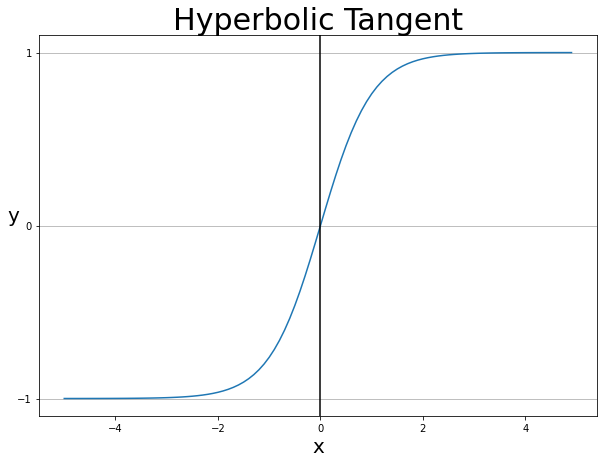

## Hyperbolic Tangent
하이퍼볼릭 탄젠트 함수는 -1에서 1 사이의 값을 출력하며, 중앙값도 0이다

### 하이퍼볼릭 탄젠트와 시그모이드 함수
하이퍼볼릭 탄젠트는 중앙값이 0이기 때문에, 경사하강법 사용 시 <b>시그모이드 함수에서 발생하는 편향 이동이 발생하지 않는다.</b>


즉, 기울기가 양수 음수 모두 나올 수 있기 때문에 시그모이드 함수보다 <b>학습 효율성이 뛰어나다.</b>


또한, 시그모이드 함수보다 범위가 넓기 때문에 출력값의 변화폭이 더 크고, 그로 인해 기울기 소실(Gradient Vanishing) 증상이 더 적은 편이다.
(※ 기울기 소실(Gradient Vanishing): 미분 함수에 대하여, 값이 일정 이상 커지는 경우 미분값이 소실되는 현상)


때문에 은닉층에서 시그모이드 함수와 같은 역할을 하는 레이어를 쌓고자 한다면, 하이퍼볼릭 탄젠트를 사용하는 것이 효과적이다.


그러나, 시그모이드 함수보다 범위가 넓다 뿐이지 하이퍼볼릭 탄젠트 역시 그 구간이 그리 크지는 않은 편이므로, $x$가 -5보다 작고 5보다 큰 경우, <b>기울기(Gradient)가 0으로 작아져 소실되는 기울기 소실 현상 문제는 여전히 존재한다. </b>

출처: https://gooopy.tistory.com/54?category=824281

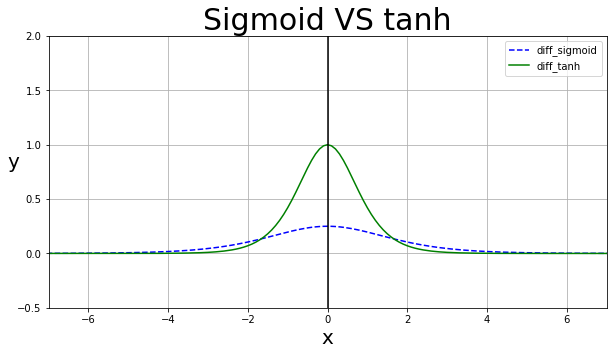

### 하이퍼볼릭 탄젠트 함수 순전파
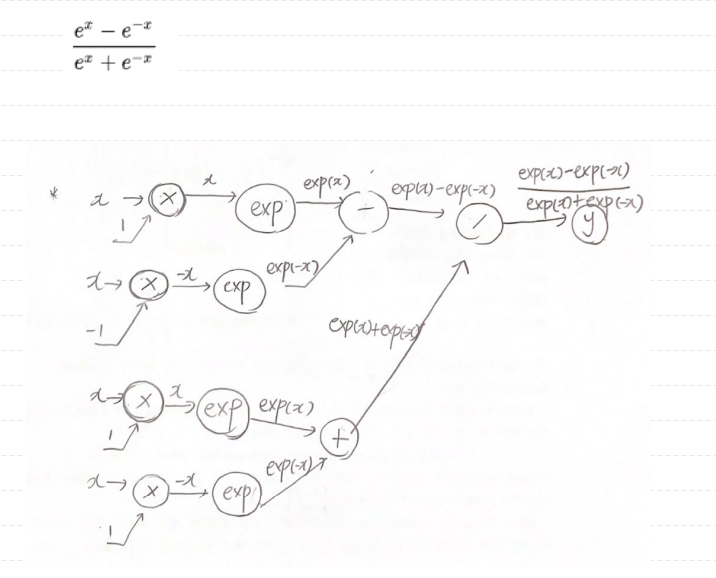

### 하이퍼볼릭 탄젠트 함수의 미분
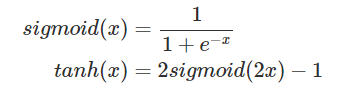

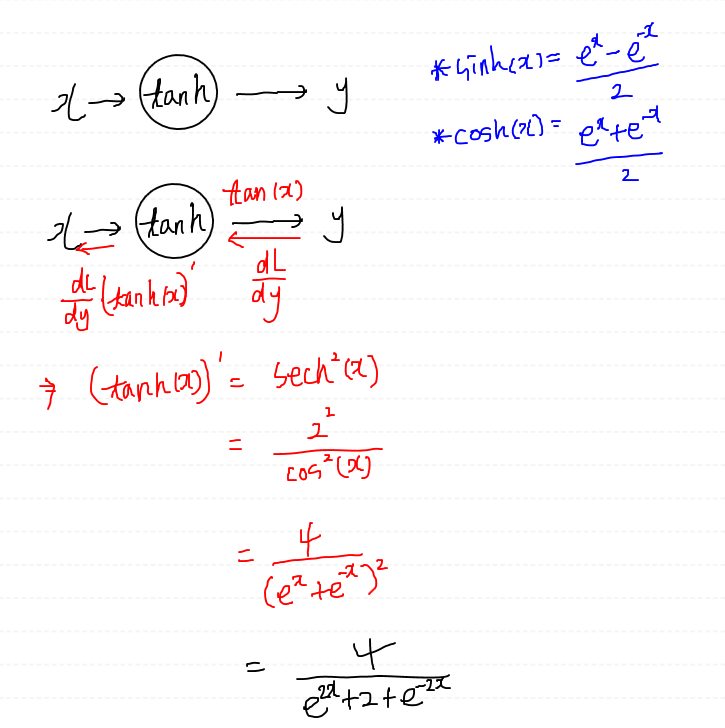

In [13]:
import numpy as np

In [14]:
def tanh(x):
    p_exp_x = np.exp(x)
    m_exp_x = np.exp(-x)

    y = (p_exp_x - m_exp_x)/(p_exp_x + m_exp_x)
    return y

In [15]:
# 하이퍼볼릭 탄젠트의 미분
def diff_tanh(x):
    return 4 / (np.exp(2*x) + 2 + np.exp(-2*x))

In [16]:
class tanH:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = tanh(x) 
        self.out = out # 순전파의 출력을 인스턴스 변수 out에 보관
        return out

    def backward(self, dout): # 미분해서 나온 값을 넣어줍니다.
        dx = dout * 4 / (np.exp(2*self.out) + 2 + np.exp(-2*self.out)) # 역전파 계산 때 저장한 out값을 사용

        return dx

In [17]:
tan = tanH()

In [12]:
tan.forward(np.array([1,-2,3,-4]))

array([ 0.76159416, -0.96402758,  0.99505475, -0.9993293 ])